In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

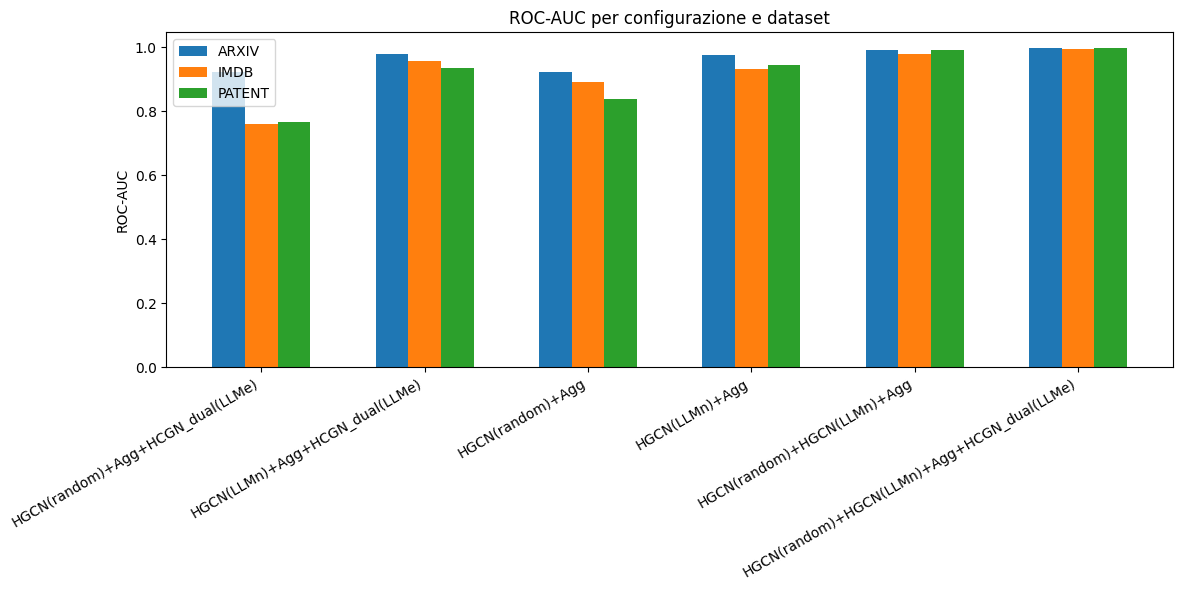

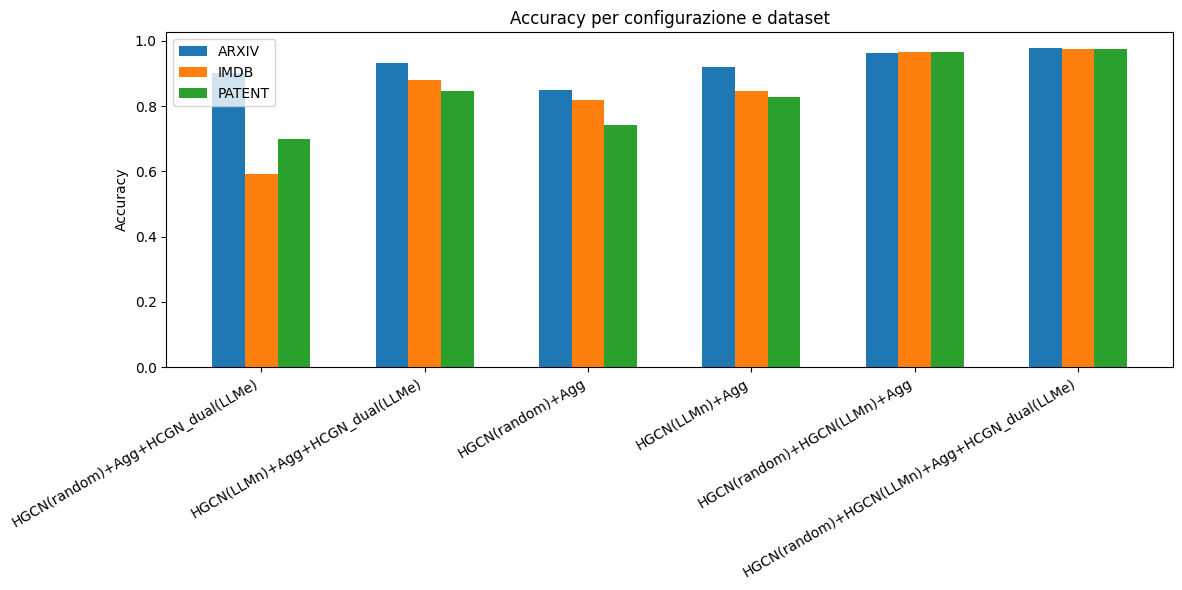

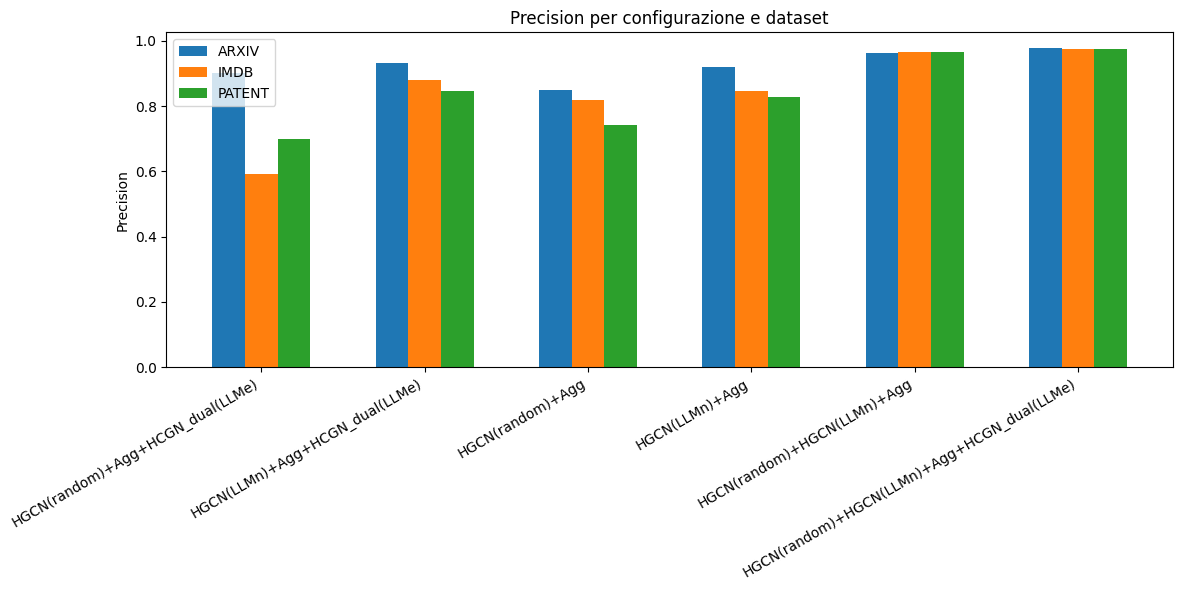

In [9]:
configs = [
    "HGCN(random)+Agg+HCGN_dual(LLMe)",
    "HGCN(LLMn)+Agg+HCGN_dual(LLMe)",
    "HGCN(random)+Agg",
    "HGCN(LLMn)+Agg",
    "HGCN(random)+HGCN(LLMn)+Agg",
    "HGCN(random)+HGCN(LLMn)+Agg+HCGN_dual(LLMe)"
]

data = {
    "Config": configs,
    "ARXIV_ROC-AUC": [0.922, 0.98, 0.924, 0.9748, 0.9927, 0.9974],
    "ARXIV_Accuracy": [0.9012, 0.9307, 0.85, 0.9182, 0.961, 0.977],
    "ARXIV_Precision": [0.9012, 0.9307, 0.85, 0.9182, 0.961, 0.977],
    "IMDB_ROC-AUC": [0.7618, 0.9576, 0.8933, 0.9325, 0.9793, 0.995],
    "IMDB_Accuracy": [0.5926, 0.8801, 0.819, 0.8472, 0.9665, 0.9752],
    "IMDB_Precision": [0.5926, 0.8801, 0.819, 0.8472, 0.9665, 0.9752],
    "PATENT_ROC-AUC": [0.767, 0.9363, 0.8377, 0.9457, 0.9907, 0.9968],
    "PATENT_Accuracy": [0.7004, 0.8476, 0.743, 0.827, 0.9645, 0.9757],
    "PATENT_Precision": [0.7004, 0.8476, 0.743, 0.827, 0.9645, 0.9757],
}

df = pd.DataFrame(data)

def plot_metric(metric, df, datasets=["ARXIV", "IMDB", "PATENT"]):
    x = np.arange(len(df["Config"]))
    width = 0.2

    fig, ax = plt.subplots(figsize=(12, 6))
    
    for i, dataset in enumerate(datasets):
        vals = df[f"{dataset}_{metric}"]
        ax.bar(x + i*width, vals, width, label=dataset)

    ax.set_ylabel(metric)
    ax.set_title(f"{metric} per configurazione e dataset")
    ax.set_xticks(x + width)
    ax.set_xticklabels(df["Config"], rotation=30, ha="right")
    ax.legend()

    plt.tight_layout()
    plt.show()

plot_metric("ROC-AUC", df)
plot_metric("Accuracy", df)
plot_metric("Precision", df)


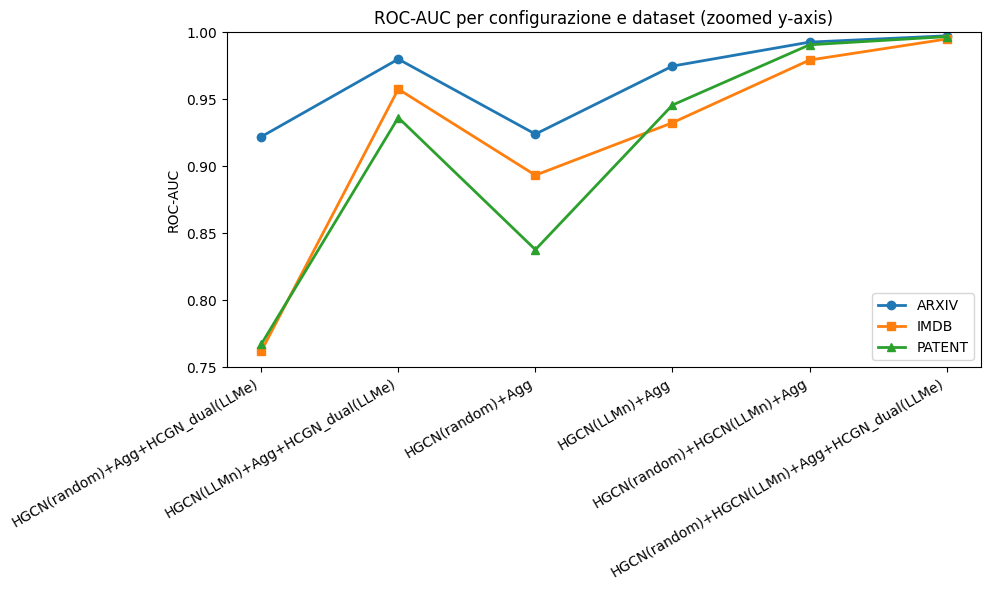

In [ ]:
df = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(len(df["Config"]))

ax.plot(x, df["ARXIV_ROC-AUC"], marker='o', label='ARXIV', linewidth=2)
ax.plot(x, df["IMDB_ROC-AUC"], marker='s', label='IMDB', linewidth=2)
ax.plot(x, df["PATENT_ROC-AUC"], marker='^', label='PATENT', linewidth=2)

ax.set_xticks(x)
ax.set_xticklabels(df["Config"], rotation=30, ha='right')
ax.set_ylabel("ROC-AUC")
ax.set_title("ROC-AUC per configurazione e dataset (zoomed y-axis)")

ax.set_ylim(0.75, 1.0)

ax.legend()
plt.tight_layout()
plt.show()

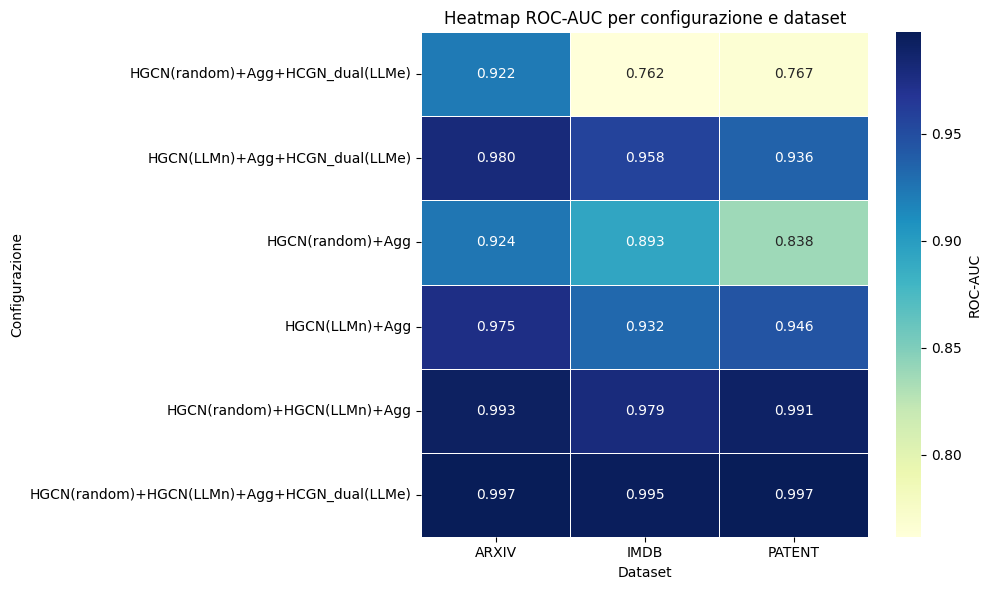

In [ ]:
df = pd.DataFrame(data, index=configs)

plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, fmt=".3f", cmap="YlGnBu", cbar_kws={'label': 'ROC-AUC'}, linewidths=0.5)

plt.title("Heatmap ROC-AUC per configurazione e dataset")
plt.ylabel("Configurazione")
plt.xlabel("Dataset")
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
